# Neural Networks - Classification

In this tutorial, we will create a classification model, that predicts the value (0 to 9) from a picture with a handwritten digit.

## 0. Import python modules

We will use the Tensoflow/Keras framework for neural network machine learning.

In [35]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from plot_loss import plot_loss # own function in plot_loss.py

## 1. Load the dataset

The goal is to make a model that can recognize handwritten digits. We make use of the MNIST dataset, which is a well-known dataset of handwritten digits: https://www.tensorflow.org/datasets/catalog/mnist. The training dataset has 60000 images, the test dataset 10000. Images are grayscale and have a size of 28x28 pixels. Each pixel has a value between 0 (black) and 255 (white). The dataset is already split into train and test, so we do not have to do this ourselves. In case this is not yet done, the `train_test_split` function of `sklearn.model_selection` can be used (`from sklearn.model_selection import train_test_split`).

In [36]:
# Load the training and test dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 60000 training images with 28x28 pixels
print(x_train.shape)
print(y_train.shape)
# print(x_train[0])

(60000, 28, 28)
(60000,)


x_train and x_test are 3-dimensional arrays used as input for the model. We can look at the first training image. This is a 2-dimensional array of 28 by 28. The y-values are the class the model should predict, it is a 1-dimensional array with a number 0 to 9.

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 

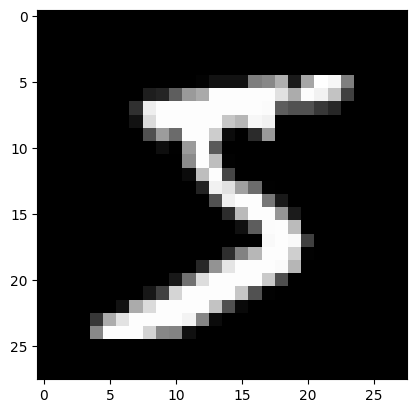

In [37]:
# y value of the first image (= class the model should predict)
print(y_train[0])
# x value (= input for the model)
print(x_train[0])
plt.imshow(x_train[0], cmap='gray', vmin=0, vmax=255)

## 2. Data transformation and normalisation

The input for our neural network with dense layers is a 2-dimensional array. The first dimension is the number of the sample. The second dimension is the number of the input node. So the 2-dimensional images need to be converted to a 1-dimensional array fitting the input layer of our model.

In [38]:
# transform the 2D-images to 1D-arrays (28 x 28 = 784)
x_train = x_train.reshape((-1, 784))   # or x_train.reshape((60000, 784))
x_test = x_test.reshape((-1, 784))
print(x_train.shape)

(60000, 784)


Now we normalize the input samples using min-max normalisation to get values between 0 and 1. We use the `MinMaxScaler` from `sklearn.preprocessing`. As we know the maximum value is 255, we could also just divide by 255.

In [58]:
# scale input
import pandas as pd
scaler = MinMaxScaler()
x_train_norm = scaler.fit_transform(x_train) # makes values between 0 and 1 to normalize them
x_test_norm = scaler.transform(x_test)    # no fit, so that same scaling is used

# df = pd.DataFrame(x_train_norm[0])
# # df[df[:] > 0]
# print(x_train_norm[0])
# print(x_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

Now we use one-hot encoding for the output. This means that the model will output 10 probabilities (probability that digit is 0, ..., probability that digit is 9). We use the `to_categorical` function from `tensorflow.keras.utils`. In case the dataset is a pandas dateframe, the `pd.get_dummies` function can be used.

In [40]:
# one-hot encoding for output
print(y_train[0])
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)
print(y_train_onehot.shape)
print(y_train_onehot[0])

5
(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 3. Define the model

##### The input layer has 784 nodes (28 x 28). We choose 2 hidden layers with 128 and 64 nodes and a `relu` activation function (feel free to try other values/functions). The output layer has 10 nodes corresponding to the one-hot encoding vector size. The activation function of the output layer is important. As the output are 10 probabilities, the sum of them must be 1. The `softmax` activation function is enforcing this. We choose Adam as optimizer with a learning rate of `0.001`. The loss is the `categorical_crossentropy` loss which is used for classification models using one-hot encoding as output (and so used together with the `softmax` activation function). We also define a `accuracy` metric.

In [41]:
# input layer 784 nodes
inputs = Input(shape=(784,))
# 2 hidden layers
x = Dense(128, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
# output layer
outputs = Dense(10, activation='softmax')(x)
# construct the model
model = Model(inputs, outputs, name='MNIST')
# print a summary
model.summary()
# compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# """
# WARNING:tensorflow:From C:\Users\depaepeg\OneDrive - KdG\Cursussen\04. Data Science 2\Py\pyvenv\Lib\site-packages\keras\src\backend.py:1398: The name tf.executing_eagerly_outside_functions is deprecated. Please use tf.compat.v1.executing_eagerly_outside_functions instead.
# 
# Model: "MNIST"
# _________________________________________________________________
#  Layer (type)                Output Shape              Param #   
# =================================================================
#  input_1 (InputLayer)        [(None, 784)]             0         
#                                                                  
#  dense (Dense)               (None, 128)               100480    
#                                                                  
#  dense_1 (Dense)             (None, 64)                8256      
#                                                                  
#  dense_2 (Dense)             (None, 10)                650       
#                                                                  
# =================================================================
# Total params: 109386 (427.29 KB)
# Trainable params: 109386 (427.29 KB)
# Non-trainable params: 0 (0.00 Byte)
# _________________________________________________________________
# """

Model: "MNIST"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Train the model

We train the model for 5 epochs, with a batch size of 32 (feel free to try other values). We take 10% of the training dataset for validation data.

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9889 - loss: 0.0325 - val_accuracy: 0.9803 - val_loss: 0.0817
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9917 - loss: 0.0243 - val_accuracy: 0.9755 - val_loss: 0.0995
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9918 - loss: 0.0238 - val_accuracy: 0.9788 - val_loss: 0.0908
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9926 - loss: 0.0202 - val_accuracy: 0.9832 - val_loss: 0.0789
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9938 - loss: 0.0178 - val_accuracy: 0.9793 - val_loss: 0.0976


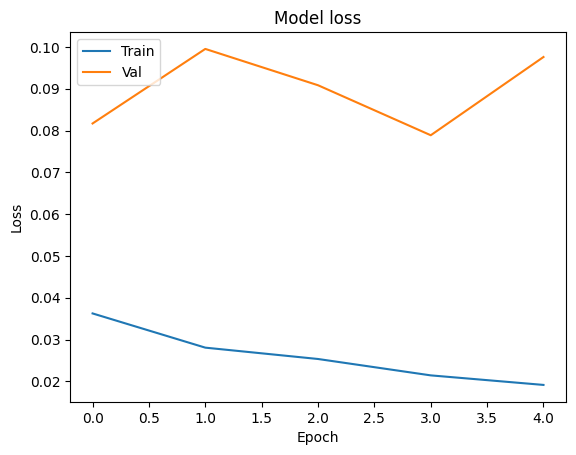

None


In [59]:
# train the model
history = model.fit(
    x_train_norm, # training input
    y_train_onehot, # training targets
    epochs=5,
    batch_size=32,
    validation_split=0.1,
)
# plot loss function
print(plot_loss(history))

## 5. Evaluate the model

Now we evaluate our model with the test data, which has not been used during training. Have a look at the accuracy score.

In [43]:
# evaluate
model.evaluate(x_test_norm,y_test_onehot)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9705 - loss: 0.0999


[0.08302538841962814, 0.975600004196167]

## 6. Use the model to predict

We can start using the model to predict hand written digits. Here we predict the first 2 digits of the test dataset. The output of the model are probabilities. Look at the probabilities that the first digit is 7 and the second is a 2.

In [44]:
# predict 
predicted = model.predict(x_test_norm[:2])
print(predicted)
# what it should be
print(y_test[:2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
[[2.1493253e-07 6.3981761e-06 1.8519706e-05 3.9097731e-04 2.7486275e-11
  9.8001607e-08 6.1098121e-10 9.9957937e-01 9.6807821e-07 3.4237041e-06]
 [2.1877415e-12 1.4366253e-04 9.9985588e-01 3.6585291e-07 8.6217757e-13
  2.5770968e-08 8.8129974e-09 3.7152982e-11 2.9960489e-08 5.5585733e-13]]
[7 2]
